In [48]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [49]:
milk = pd.read_csv("D:\workspace\MachineLearning\Datasets\Datasets\milk.csv",index_col=0)

std_scl = StandardScaler().set_output(transform='pandas')
milk_scl = std_scl.fit_transform(milk)



In [50]:
pca = PCA(n_components=2).set_output(transform='pandas')
PC_data = pca.fit_transform(milk_scl)

In [51]:
clust = KMeans(n_clusters=2, random_state=25)
clust.fit(milk_scl)

KMeans(n_clusters=2, random_state=25)

In [52]:
PC_data['Cluster'] = clust.labels_
# PC_data['Cluster']=PC_data['Cluster'].astype(str)
silhouette_score(PC_data.iloc[:,:-1], PC_data.iloc[:,-1])

0.5604045321395169

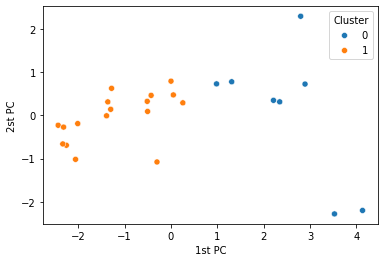

In [53]:
sns.scatterplot(data=PC_data, x='pca0', y='pca1', hue='Cluster')
plt.xlabel('1st PC')
plt.ylabel('2st PC')
plt.show()

In [54]:
clust = DBSCAN(eps=2,min_samples=2)
clust.fit(milk_scl)

DBSCAN(eps=2, min_samples=2)

In [57]:
PC_data['Cluster'] = clust.labels_
# PC_data['Cluster']=PC_data['Cluster'].astype(str)
silhouette_score(PC_data.iloc[:,:-1], PC_data.iloc[:,-1])

0.5478097777604157

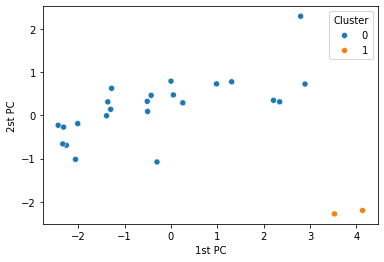

In [58]:
sns.scatterplot(data=PC_data, x='pca0', y='pca1', hue='Cluster')
plt.xlabel('1st PC')
plt.ylabel('2st PC')
plt.show()

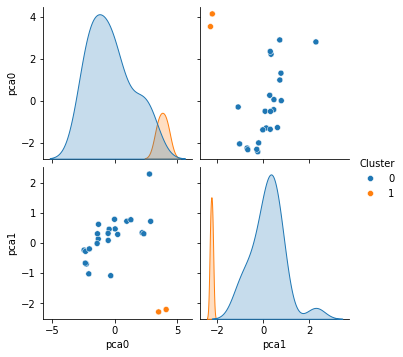

In [62]:
sns.pairplot(data=PC_data, hue='Cluster')